# Week 4 Analyze Data

In [28]:
# Import Packages
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import datetime as dt
import scipy as scp
from scipy.stats import ttest_ind
from scipy import stats

#linear regression
from pylab import *
import statsmodels.api as sm
import statsmodels.stats.api as sms


#Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

###scikit Learn Modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dummy coded data
cleanDummy = pd.read_csv('../Data/cleanDummy.csv')

In [3]:
cleanDummy.head()

,Unnamed: 0,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus,genderR,ownsCarR,ownsRealtyR,eduLvlR,incomeTypeR,housingTypeR,famStatusR
0,0,427500,2,33,12,1,1,1,1,1,0,0,0,0
1,31,112500,2,59,3,1,1,1,1,1,1,0,1,1
2,61,270000,1,53,8,1,1,0,0,1,1,1,1,2
3,137,283500,1,62,0,0,0,0,0,1,0,2,1,3
4,188,270000,2,47,2,1,0,1,1,1,0,0,1,1


In [3]:
# Drop Unnamed:0 col
cleanDummy.drop('Unnamed: 0', axis=1, inplace=True) 

In [4]:
cleanDummy.head()

,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus,genderR,ownsCarR,ownsRealtyR,eduLvlR,incomeTypeR,housingTypeR,famStatusR
0,427500,2,33,12,1,1,1,1,1,0,0,0,0
1,112500,2,59,3,1,1,1,1,1,1,0,1,1
2,270000,1,53,8,1,1,0,0,1,1,1,1,2
3,283500,1,62,0,0,0,0,0,1,0,2,1,3
4,270000,2,47,2,1,0,1,1,1,0,0,1,1


# Part 1: Decision Tree and Random Forest to Predict CC Approval (Original Data)

In [5]:
# Handling Continuous Variable outliers
def dropOL(ftr):
    q75,q25 = np.percentile(cleanDummy[ftr],[75,25])
    intr_qr = q75-q25
    mx = q75+(1.5*intr_qr)
    mn = q25-(1.5*intr_qr)
    return mx,mn

<AxesSubplot:>

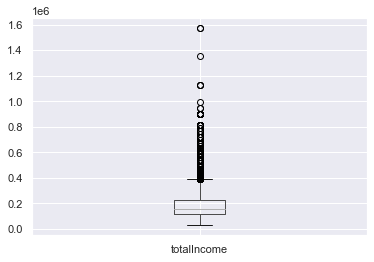

In [ ]:
# total income original boxplot
cleanDummy.boxplot('totalIncome')

In [7]:
# Drop outliers for totalIncome 
mx,mn = dropOL('totalIncome')

In [8]:
cleanDummy.drop(cleanDummy[cleanDummy.totalIncome > mx].index,inplace=True)

<AxesSubplot:>

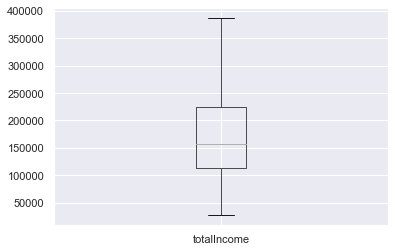

In [9]:
cleanDummy.boxplot('totalIncome')

<AxesSubplot:>

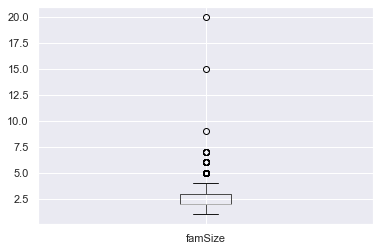

In [10]:
# family size original boxplot
cleanDummy.boxplot('famSize')

In [11]:
mx,mn = dropOL('famSize')

In [12]:
cleanDummy.drop(cleanDummy[cleanDummy.famSize > mx].index,inplace=True)

<AxesSubplot:>

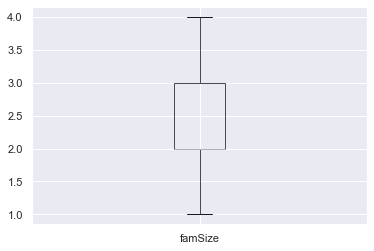

In [13]:
cleanDummy.boxplot('famSize')

<AxesSubplot:>

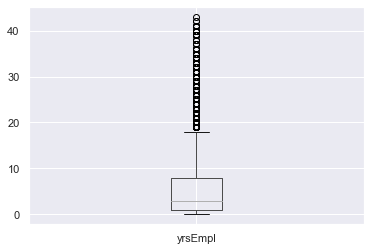

In [14]:
# years employed original boxplot
cleanDummy.boxplot('yrsEmpl')

In [15]:
mx,mn = dropOL('yrsEmpl')

In [16]:
cleanDummy.drop(cleanDummy[cleanDummy.yrsEmpl > mx].index,inplace=True)

<AxesSubplot:>

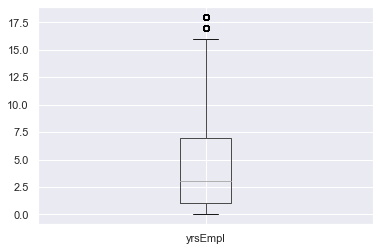

In [17]:
cleanDummy.boxplot('yrsEmpl')

In [18]:
# save dummy file without outliers
cleanDummy.to_csv("../Data/cleanDummyDropOL.csv")

In [19]:
cleanDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11978 entries, 1 to 13305
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   totalIncome   11978 non-null  int64
 1   famSize       11978 non-null  int64
 2   ageYrs        11978 non-null  int64
 3   yrsEmpl       11978 non-null  int64
 4   UNEMPLOYED    11978 non-null  int64
 5   ApprStatus    11978 non-null  int64
 6   genderR       11978 non-null  int64
 7   ownsCarR      11978 non-null  int64
 8   ownsRealtyR   11978 non-null  int64
 9   eduLvlR       11978 non-null  int64
 10  incomeTypeR   11978 non-null  int64
 11  housingTypeR  11978 non-null  int64
 12  famStatusR    11978 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


# Random Forests Analysis to Predict Applicant Approval

### Single decision tree model

In [20]:
# train-test-split 
X = cleanDummy.drop('ApprStatus', axis=1)
y = cleanDummy['ApprStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Create single decision tree
decisionTree = DecisionTreeClassifier()

In [22]:
# train the model
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
#Assess the model
treePredictions = decisionTree.predict(X_test)

In [24]:
print(confusion_matrix(y_test, treePredictions))

[[ 576 1186]
 [1362  470]]


In [25]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.30      0.33      0.31      1762
           1       0.28      0.26      0.27      1832

    accuracy                           0.29      3594
   macro avg       0.29      0.29      0.29      3594
weighted avg       0.29      0.29      0.29      3594



## Observations (Single Decision Tree)

* This decision tree model is not so good at predicting Approval status.  
* Rejection was predicted with 30% precision, and approval was predicted with 28% accuracy.
* Overall, you can predict approval status with 29% accuracy using the single decision tree model.

## Determine if we can get a better model using Random Forest

In [26]:
forest = RandomForestClassifier(n_estimators = 250, random_state = 76)

In [27]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=76)

In [28]:
forestPredictions = forest.predict(X_test)

In [29]:
print(confusion_matrix(y_test, forestPredictions))

[[ 408 1354]
 [1199  633]]


In [30]:
print(classification_report(y_test, forestPredictions))

              precision    recall  f1-score   support

           0       0.25      0.23      0.24      1762
           1       0.32      0.35      0.33      1832

    accuracy                           0.29      3594
   macro avg       0.29      0.29      0.29      3594
weighted avg       0.29      0.29      0.29      3594



## Observations (Random Forest)

* This model is overall not much more accurate than the single tree model.
* Interestingly, this model predicts approval with slightly more accuracy than the single tree model when compared to rejection.

### See if we can improve model fit using hyperparameter tuning

In [32]:
# find best number of estimators to use
n_estimators_array = [1,4,5,8,10,20,50,75,100,250,500]

In [33]:
results = []

for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators = n, random_state = 76)
    forest.fit(X_train, y_train)
    result = accuracy_score(y_test, forest.predict(X_test))
    results.append(result)
    
print(n, ':', result)

500 : 0.29020589872008906


In [34]:
# number of features to consider at every split
max_features = ['sqrt', None, 'log2']

In [35]:
# maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]

In [36]:
# minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

In [37]:
# minimum number of samples for training each tree
random_grid = {'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_leaf' : min_samples_leaf}

In [38]:
print(random_grid)

{'max_features': ['sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [39]:
rf = RandomForestClassifier(n_estimators=500)

In [24]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv=3) 

In [25]:
# fit the model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=250),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['sqrt', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]})

In [26]:
# find out which hyperparameter produced the best accuracy
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}

## The model with the best accuracy has at least 4 samples per leaf, has a max features setting of log2, and has a max depth of 10 decision points.

In [40]:
# Run one last random forest that has these chosen parameters:
forest = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 4, max_features = 'log2', max_depth = 10)

In [41]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       n_estimators=500)

In [42]:
forestPredictions = forest.predict(X_test)

In [43]:
print(confusion_matrix(y_test, forestPredictions))

[[ 233 1529]
 [ 521 1311]]


In [44]:
print(classification_report(y_test, forestPredictions))

              precision    recall  f1-score   support

           0       0.31      0.13      0.19      1762
           1       0.46      0.72      0.56      1832

    accuracy                           0.43      3594
   macro avg       0.39      0.42      0.37      3594
weighted avg       0.39      0.43      0.38      3594



## Observations (Hyperparameter tuning)


* This model appears to predict approvals more accurately than rejections.
* The overall weighted accuracy of this model is 39%, which is somewhat better than the previous models.

## Features Importance - which variable(s) make the most difference in the prediction of credit card approval?

In [45]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances

totalIncome     0.215290
famSize         0.064472
ageYrs          0.241665
yrsEmpl         0.150804
UNEMPLOYED      0.008321
genderR         0.035792
ownsCarR        0.035212
ownsRealtyR     0.033626
eduLvlR         0.051975
incomeTypeR     0.053355
housingTypeR    0.047294
famStatusR      0.062195
dtype: float64

In [46]:
# to see these values listed from largest (better feature performance) to smallest:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

ageYrs          0.241665
totalIncome     0.215290
yrsEmpl         0.150804
famSize         0.064472
famStatusR      0.062195
incomeTypeR     0.053355
eduLvlR         0.051975
housingTypeR    0.047294
genderR         0.035792
ownsCarR        0.035212
ownsRealtyR     0.033626
UNEMPLOYED      0.008321
dtype: float64


<AxesSubplot:>

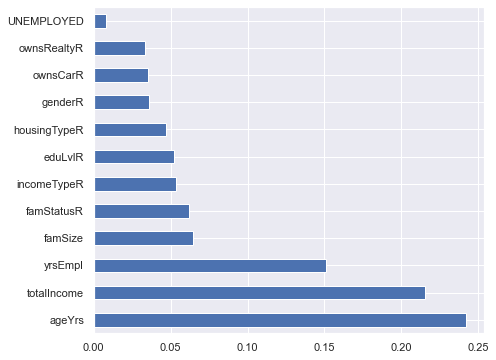

In [47]:
# visualize these with a graph
feature_importances.plot(kind='barh', figsize=(7,6))

## Observations (features importance)

* It appears that an applicants' age and total income have the most influence on whether or not they'll be approved for a credit card. This makes sense, as those who are older likely have an established credit history (for better or for worse) compared to those who are "less experienced" with managing credit cards.
* I will use the top 3 features to train on in hopes that I can get a better model fit to predict my credit card approvals.

# Part 2: Decision Tree and Random Forest to Predict CC Approval (BALANCED Data)

In [6]:
# import balanced dataset
balancedMF = pd.read_csv('../Data/balancedMF.csv')

In [7]:
# Drop Unnamed:0 col
balancedMF.drop('Unnamed: 0', axis=1, inplace=True) 

In [8]:
# Handling Continuous Variable outliers
def dropOL(ftr):
    q75,q25 = np.percentile(cleanDummy[ftr],[75,25])
    intr_qr = q75-q25
    mx = q75+(1.5*intr_qr)
    mn = q25-(1.5*intr_qr)
    return mx,mn

In [9]:
# Drop outliers for totalIncome 
mx,mn = dropOL('totalIncome')

In [11]:
balancedMF.drop(balancedMF[balancedMF.totalIncome > mx].index,inplace=True)

In [12]:
# Drop outliers for fam size
mx,mn = dropOL('famSize')

In [13]:
balancedMF.drop(balancedMF[balancedMF.famSize > mx].index,inplace=True)

In [14]:
# Drop outliers for yrsEmpl
mx,mn = dropOL('yrsEmpl')

In [15]:
balancedMF.drop(balancedMF[balancedMF.yrsEmpl > mx].index,inplace=True)

In [16]:
# save BALANCED dummy file without outliers
balancedMF.to_csv("../Data/BALANCEDDummyDropOL.csv")

## Random Forest (balanced data)

In [19]:
# train-test-split 
Xbal = balancedMF.drop('ApprStatus', axis=1)
ybal = balancedMF['ApprStatus']
X_train, X_test, y_train, y_test = train_test_split(Xbal, ybal, test_size=0.3, random_state=42)

In [20]:
forest2 = RandomForestClassifier(n_estimators = 250, random_state = 76)

In [21]:
forest2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=76)

In [22]:
forestPredictions2 = forest2.predict(X_test)

In [23]:
print(confusion_matrix(y_test, forestPredictions2))

[[310 910]
 [805 526]]


In [24]:
print(classification_report(y_test, forestPredictions2))

              precision    recall  f1-score   support

           0       0.28      0.25      0.27      1220
           1       0.37      0.40      0.38      1331

    accuracy                           0.33      2551
   macro avg       0.32      0.32      0.32      2551
weighted avg       0.32      0.33      0.33      2551



## Observations (Random Forest using balanced dataset)

* This model predicted Credit Card approval with 32% accuracy. This is similar to the unbalanced dataset result, where the random forest model predicted approval slightly more accurately than rejection.

## Hyperparameter tuning on balanced data

In [29]:
# find best number of estimators to use
n_estimators_array2 = [1,4,5,8,10,20,50,75,100,250,500]

In [30]:
results2 = []

for n in n_estimators_array2:
    forest2 = RandomForestClassifier(n_estimators = n, random_state = 76)
    forest2.fit(X_train, y_train)
    result = accuracy_score(y_test, forest2.predict(X_test))
    results2.append(result)
    
print(n, ':', result)

500 : 0.3296746373970992


In [31]:
# number of features to consider at every split
max_features2 = ['sqrt', None, 'log2']

In [32]:
# maximum number of levels in tree
max_depth2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]

In [40]:
# minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

In [42]:
# minimum number of samples for training each tree
random_grid2 = {'max_features' : max_features2,
               'max_depth' : max_depth2,
               'min_samples_leaf' : min_samples_leaf2}

In [43]:
print(random_grid2)

{'max_features': ['sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [44]:
rf2 = RandomForestClassifier(n_estimators=500)

In [45]:
rf_random2 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid2, n_iter = 90, cv=3) 

In [46]:
# fit the model
rf_random2.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['sqrt', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]})

In [47]:
# find out which hyperparameter produced the best accuracy
rf_random2.best_params_

{'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}

In [48]:
# Run one last random forest that has these chosen parameters:
forest3 = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 4, max_features = 'log2', max_depth = 10)

In [49]:
forest3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       n_estimators=500)

In [50]:
forestPredictions3 = forest3.predict(X_test)

In [51]:
print(confusion_matrix(y_test, forestPredictions3))

[[244 976]
 [519 812]]


In [52]:
print(classification_report(y_test, forestPredictions3))

              precision    recall  f1-score   support

           0       0.32      0.20      0.25      1220
           1       0.45      0.61      0.52      1331

    accuracy                           0.41      2551
   macro avg       0.39      0.41      0.38      2551
weighted avg       0.39      0.41      0.39      2551



## Features Importance - BALANCED Data

In [53]:
feature_importances2 = pd.Series(forest2.feature_importances_, index=Xbal.columns)
feature_importances2

totalIncome     0.216256
famSize         0.046200
ageYrs          0.231707
yrsEmpl         0.250128
UNEMPLOYED      0.003812
ownsCarR        0.028932
ownsRealtyR     0.028202
eduLvlR         0.045490
incomeTypeR     0.041852
housingTypeR    0.030931
famStatusR      0.045578
genderR         0.030912
dtype: float64

In [54]:
# to see these values listed from largest (better feature performance) to smallest:
feature_importances2.sort_values(inplace=True, ascending=False)
print(feature_importances2)

yrsEmpl         0.250128
ageYrs          0.231707
totalIncome     0.216256
famSize         0.046200
famStatusR      0.045578
eduLvlR         0.045490
incomeTypeR     0.041852
housingTypeR    0.030931
genderR         0.030912
ownsCarR        0.028932
ownsRealtyR     0.028202
UNEMPLOYED      0.003812
dtype: float64


<AxesSubplot:>

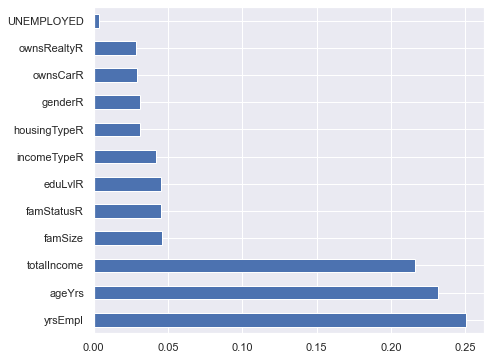

In [55]:
# visualize these with a graph
feature_importances2.plot(kind='barh', figsize=(7,6))

# Conclusions (Random Forests and Hypertuning)

* We got relatively the same results when modeling with the original data and balanced data. The random forests models both predicted credit card approval accurately about 30% of the time, and with hyperparameter tuning, we were able to get the prediction accuracy up to 39%.
* The features that make the most difference in the prediction of credit card approval were found to be: age, income, and years employed.
* Use these important features to train a model and perform stepwise linear regression to see if we can get a better model.